<a href="https://colab.research.google.com/github/Rohit30122001/Deep-Learning/blob/main/Facial_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/facial_expression/

/content/drive/MyDrive/facial_expression


In [3]:
!ls

checkpoint  fer2013  fer2013.tar.gz


In [4]:
import tarfile


fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

df = pd.read_csv('fer2013/fer2013.csv')

In [6]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [8]:
label_to_text = {0:'anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'neutral'}

In [9]:
img0 = np.array(df['pixels'].loc[0].split(' ')).reshape(48,48,1).astype('float')

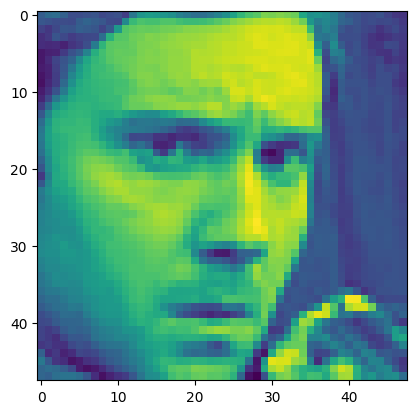

In [10]:
plt.imshow(img0)

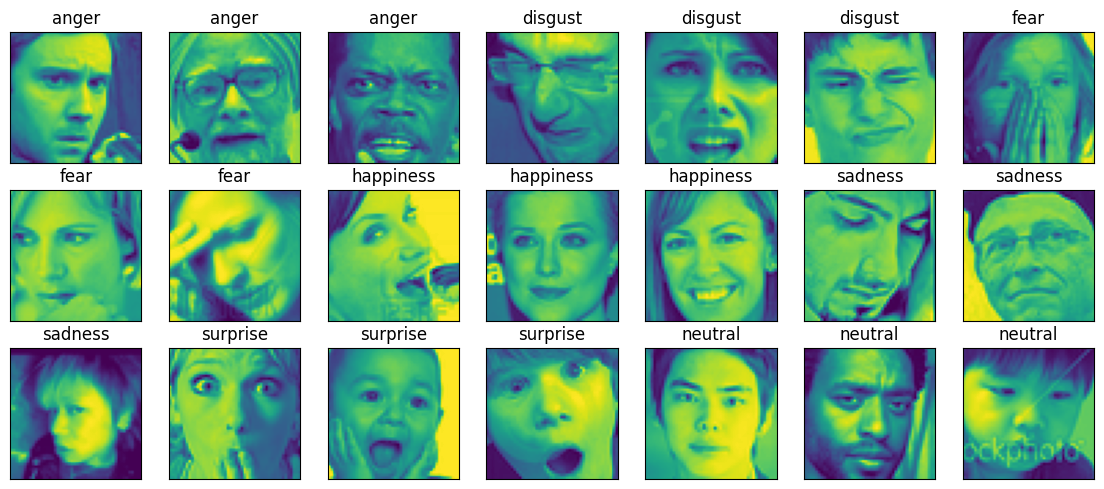

In [11]:
fig = plt.figure(1,(14,14))
k = 0
for label in sorted(df['emotion'].unique()):
  for j in range(3):
    px = df[df['emotion'] == label].pixels.iloc[k]
    px = np.array(px.split(' ')).reshape(48,48).astype('float')
    k = k+1
    ax = plt.subplot(7,7,k)
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label_to_text[label])
    plt.tight_layout

In [12]:
img_arr = df['pixels'].apply(lambda x: np.array(x.split(' ')).reshape(48,48).astype('float'))

In [13]:
img_arr = np.stack(img_arr,axis = 0)

In [14]:
labels = df['emotion'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(img_arr,labels,test_size = 0.1)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32298, 48, 48), (3589, 48, 48), (32298,), (3589,))

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization

In [21]:
model = Sequential()


model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (48,48,1)))
model.add(MaxPool2D(2,2))

#
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (48,48,1)))
model.add(MaxPool2D(2,2))

#
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

#
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))


model.add(Flatten())

model.add(Dense(1000,activation = 'relu'))
model.add(Dense(7,activation = 'softmax'))

In [22]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [23]:
import os

In [24]:
try:
  os.mkdir('checkpoint')
except:
  pass

In [25]:
File_name = 'best_model'
checkpoint_path = os.path.join('checkpoint',File_name)

In [26]:
call_back = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                            monitor = 'val_accuracy',
                                                            verbose = 1,
                                                            save_freq = 'epoch',
                                                            save_best_only = True,
                                                            sav_weights_only  = False,
                                                            mode = 'max')

In [30]:
model.fit(X_train,y_train,epochs = 50,validation_split = 0.3,callbacks = call_back)

Epoch 1/50
902/909 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.9782
Epoch 1: val_accuracy did not improve from 0.56563
909/909 [==============================] - 5s 5ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 3.4049 - val_accuracy: 0.5539
Epoch 2/50
909/909 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9809
Epoch 2: val_accuracy did not improve from 0.56563
909/909 [==============================] - 6s 7ms/step - loss: 0.0675 - accuracy: 0.9809 - val_loss: 3.6552 - val_accuracy: 0.5319
Epoch 3/50
901/909 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9819
Epoch 3: val_accuracy did not improve from 0.56563
909/909 [==============================] - 7s 8ms/step - loss: 0.0621 - accuracy: 0.9816 - val_loss: 3.2723 - val_accuracy: 0.5650
Epoch 4/50
907/909 [============================>.] - ETA: 0s - loss: 0.0595 - accuracy: 0.9830
Epoch 4: val_accuracy improved from 0.56563 to 0.56594, saving model t

909/909 [==============================] - 11s 12ms/step - loss: 0.0596 - accuracy: 0.9829 - val_loss: 3.5475 - val_accuracy: 0.5659
Epoch 5/50
908/909 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9831
Epoch 5: val_accuracy improved from 0.56594 to 0.56904, saving model to checkpoint/best_model


909/909 [==============================] - 8s 9ms/step - loss: 0.0618 - accuracy: 0.9831 - val_loss: 3.5743 - val_accuracy: 0.5690
Epoch 6/50
907/909 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9836
Epoch 6: val_accuracy did not improve from 0.56904
909/909 [==============================] - 5s 5ms/step - loss: 0.0566 - accuracy: 0.9836 - val_loss: 3.4579 - val_accuracy: 0.5632
Epoch 7/50
899/909 [============================>.] - ETA: 0s - loss: 0.0530 - accuracy: 0.9851
Epoch 7: val_accuracy improved from 0.56904 to 0.57368, saving model to checkpoint/best_model


909/909 [==============================] - 6s 6ms/step - loss: 0.0528 - accuracy: 0.9850 - val_loss: 3.5244 - val_accuracy: 0.5737
Epoch 8/50
904/909 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9846
Epoch 8: val_accuracy did not improve from 0.57368
909/909 [==============================] - 5s 6ms/step - loss: 0.0567 - accuracy: 0.9847 - val_loss: 3.4933 - val_accuracy: 0.5672
Epoch 9/50
900/909 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9849
Epoch 9: val_accuracy did not improve from 0.57368
909/909 [==============================] - 4s 5ms/step - loss: 0.0542 - accuracy: 0.9849 - val_loss: 3.9302 - val_accuracy: 0.5229
Epoch 10/50
905/909 [============================>.] - ETA: 0s - loss: 0.0523 - accuracy: 0.9862
Epoch 10: val_accuracy did not improve from 0.57368
909/909 [==============================] - 4s 5ms/step - loss: 0.0525 - accuracy: 0.9861 - val_loss: 3.8198 - val_accuracy: 0.5437
Epoch 11/50
899/909 [============

actual label is neutral
1/1 [==============================] - 0s 19ms/step
predicted label is sadness


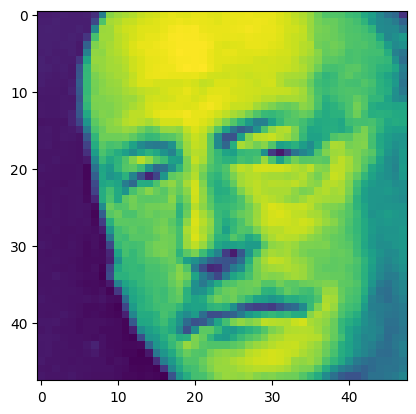

In [28]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(40):
  print(f'actual label is {label_to_text[y_test[k]]}')
  predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label is {label_to_text[predicted_class]}')
  plt.imshow((X_test[k].reshape(48,48)))
  plt.show()
  time.sleep(3)
  clear_output(wait = True)